# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [1103]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [1105]:
datapath = "~/teigen_data/output_rows.csv"

In [1106]:
plotkw ={
    "figsize": [9, 6], 
    "fontsize": 14, 
}
plot_title_size = 40
plot_linewidth = 3

plot_boxprops = {
    "linewidth": plot_linewidth
}
boxplotkw = {
    "figsize": [9, 6], 
    "fontsize": 14, 
    "boxprops": plot_boxprops,
    "medianprops": plot_boxprops,
    "whiskerprops": plot_boxprops,
    "capprops": plot_boxprops,
    
}



In [1107]:
available_radius_methods = [
    "inscribed", "circumscribed", 
    "average",
    "cylinder volume", 
    "cylinder volume + sphere error",
    "cylinder volume + sphere error + man",
    "cylinder volume + sphere error + join error",
    "cylinder surface", 
    "cylinder surface + sphere error",
    "cylinder surface + sphere error + join error",
    "cylinder surface + sphere error + join error man",
    "best",
    
]

In [1108]:

def show_error(dfs, x_key="measurement_resolution", radius_method="", plotkw={}):
    
    # print "show_error"
    # print dfs.keys()
    dfsp = dfs[["surface error [%]", "volume error [%]", 
                x_key]].sort_values(x_key)

    if len(dfsp) < 1:
        return dfsp
    wxparams = {
        # "correction": True,
        "correction": False,
        "zero_method": "pratt"
        #"zero_method": "wilcox"
    }
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], **wxparams)
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    # print dfs.keys()
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], **wxparams)
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    print radius_method, len(dfsp), ":\nvolume (w/s): \n", vol_w, "\n",vol_s, "\n", "surface (w/s): \n" , surf_w,"\n", surf_s, "\n"

    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(133)
    
    dfsp[["surface error [%]"]].plot(
        ax=ax, kind="box", **boxplotkw)
    ax = plt.subplot(131)
    dfsp.plot(
        ax=ax, x=x_key, linewidth=plot_linewidth, **plotkw)
    ax = plt.subplot(132)
    dfsp[["volume error [%]"]].plot(
        ax=ax, kind="box", **boxplotkw)
    plt.suptitle(radius_method, size=plot_title_size)
    return dfsp

In [1109]:
def dfplot(dfs, plotkw, radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    return show_error(dfsp, radius_method=radius_method)
    

In [1110]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'generator_id', u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnected tubes allow_overlap',
       u'gene

In [1111]:
df

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,step1_total_time_s,step2_generate_volume_time_s,step2_init_datetime,step2_numeric_measurement_time_s,step2_save_volume_time_s,step2_total_time_s,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[1.528557],NaN,NaN,NaN,NaN,NaN,5026.548246,0.00457,33510.321638,0.030464
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.259413],[0.000566],"[datetime.datetime(2017, 7, 6, 10, 1, 51, 1513...",[0.107797],[2.315395],[2.423758],5026.548246,0.00457,33510.321638,0.030464
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.215773],[0.000417],"[datetime.datetime(2017, 7, 6, 10, 1, 53, 8362...",[0.085791],[0.442733],[0.528941],5026.548246,0.00457,33510.321638,0.030464
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.22806],[0.000431],"[datetime.datetime(2017, 7, 6, 10, 1, 54, 9105...",[0.021983],[0.418193],[0.440607],5026.548246,0.00457,33510.321638,0.030464
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.222511],[0.000429],"[datetime.datetime(2017, 7, 6, 10, 1, 55, 9530...",[0.015471],[0.422866],[0.438766],5026.548246,0.00457,33510.321638,0.030464
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.057115],[0.000453],"[datetime.datetime(2017, 7, 6, 10, 1, 56, 9728...",[0.018994],[0.368508],[0.387955],5026.548246,0.00457,33510.321638,0.030464
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.057526],[0.000422],"[datetime.datetime(2017, 7, 6, 10, 1, 57, 8630...",[0.014536],[0.403209],[0.418167],5026.548246,0.00457,33510.321638,0.030464
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.058139],[0.000425],"[datetime.datetime(2017, 7, 6, 10, 1, 58, 7449...",[0.014417],[0.390569],[0.405411],5026.548246,0.00457,33510.321638,0.030464
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.062599],[0.000436],"[datetime.datetime(2017, 7, 6, 10, 1, 59, 7527...",[0.022227],[0.483814],[0.506477],5026.548246,0.00457,33510.321638,0.030464
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 6, 10, 1, 42, 5746...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.059528],[0.000424],"[datetime.datetime(2017, 7, 6, 10, 2, 0, 674345)]",[0.013831],[0.388076],[0.402331],5026.548246,0.00457,33510.321638,0.030464


In [1112]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [1113]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [1114]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


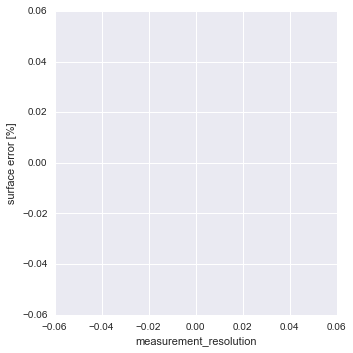

In [1115]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [1116]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [1117]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [1118]:
import seaborn as sns

In [1119]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [1120]:
pd.__version__

u'0.20.1'

In [1121]:
## element_number = 10, 
df["output note"]

0                 compensation method 1 sphere inscribed
1          compensation method 1 sphere cylinder surface
2           compensation method 1 sphere cylinder volume
3      compensation method 1 sphere cylinder volume +...
4      compensation method 1 sphere cylinder surface ...
5                 compensation method 1 sphere inscribed
6          compensation method 1 sphere cylinder surface
7           compensation method 1 sphere cylinder volume
8      compensation method 1 sphere cylinder volume +...
9      compensation method 1 sphere cylinder surface ...
10                compensation method 1 sphere inscribed
11         compensation method 1 sphere cylinder surface
12          compensation method 1 sphere cylinder volume
13     compensation method 1 sphere cylinder volume +...
14     compensation method 1 sphere cylinder surface ...
15                compensation method 1 sphere inscribed
16         compensation method 1 sphere cylinder surface
17          compensation method

In [1122]:
display("<b>ahoj<b>")

'<b>ahoj<b>'

## Compensation methods

### 1 sphere

inscribed 170 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1960577973779531e-29) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1960577973779531e-29) 
SpearmanrResult(correlation=nan, pvalue=nan) 

cylinder surface 170 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1960577973779531e-29) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1960577973779531e-29) 
SpearmanrResult(correlation=nan, pvalue=nan) 

cylinder volume 170 :
volume (w/s): 
WilcoxonResult(statistic=2020.0, pvalue=3.2132641785428004e-16) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.1960577973779531e-29) 
SpearmanrResult(correlation=nan, pvalue=nan) 



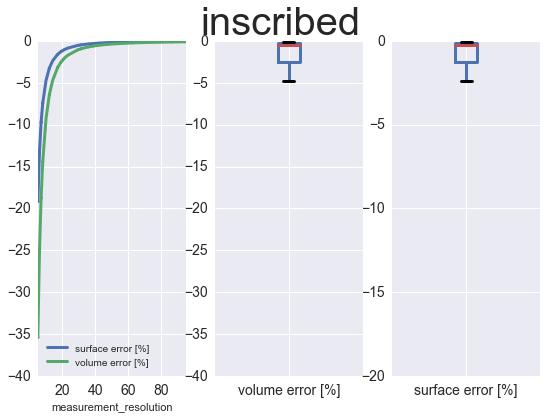

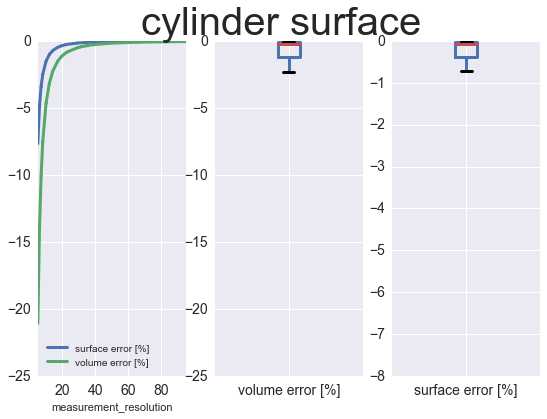

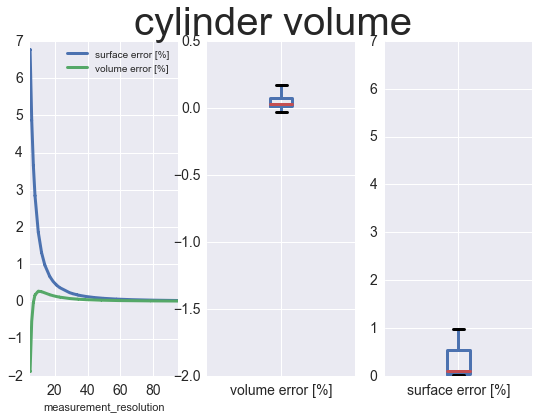

In [1123]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    #print dfs.keys()
    #display(dfs[["surface [mm^2]", "numeric surface [mm^2]"]])
    show_error(dfs, radius_method=radius_method, plotkw=plotkw)
    


### 1 tube

In [1124]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    show_error(dfs, radius_method=radius_method)
    # dfplot(dfs, plotkw, radius_method)


## N tubes

In [1125]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method N tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = show_error(dfs, radius_method=radius_method)
    


## 5 tubes

In [1126]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "compensation method 5 tubes " + radius_method
    ]
    dfsp = show_error(dfs)


In [1127]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Mix 

In [1128]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method)


In [1129]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix 2 " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method, plotkw=plotkw)


### Radius estimation

In [1130]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [1131]:
### Kontrolní výpočet objemu

In [1132]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [1133]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [1134]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [1135]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [1136]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [1137]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [1138]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [1139]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


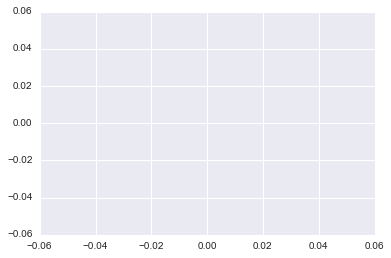

In [1140]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [1141]:
y.shape

(0,)

In [1142]:
x.shape

(0,)

In [1143]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [1144]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [1145]:
dfs

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. [],surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean


## Surface

In [1146]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1147]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1148]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [1149]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [1150]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [1151]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [1152]:
np.cos(np.pi/2)

6.123233995736766e-17